## Binning and ranking

When dealing with numerical data the trouble can sometimes be that numbers can have a wide variety.

Here we apply 2 methods to deal with that, binning and ranking.
With binning we change the numerical feature into a categorical/ordinal feature.
Ranking is used when our numerical feature contains a non normal distribution that fails to be normalized.

For this example we use a food consumption dataset, where european countries are listed and the relative percentage of each country is given that consumes the type of food, e.g. a value of 67 means that 67% of that country eats that type of food.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
food_df = pd.read_csv('https://openmv.net/file/food-consumption.csv')
food_df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30


Here you could do some data validity, where we check if all values are between 0 and 100, or we check for missing values. 
I will leave that up to you

### Binning

the first thing we want to do is seperate the countries based on their coffee consumption, instead of creating arbitrary values we can perform a quantitative cut.
This means we create a number of equally sized groups using the qcut function, we give them the labels low, medium and high.

In [3]:
food_df['bin_coffee'] = pd.qcut(food_df['Real coffee'], q=3, labels=['low', 'medium', 'high'])
food_df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,bin_coffee
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26,medium
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18,medium
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3,medium
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15,high
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5,medium
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24,high
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28,low
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9,low
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11,low
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30,low


a new column has appeared at the end of our dataframe, containing the labels of our binning, countries with low coffee consumption are put in the low category and vice versa.
Now we can seperate the countries with low coffee consumption from the rest

In [4]:
food_df[food_df.bin_coffee == 'low']

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,bin_coffee
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28,low
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9,low
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11,low
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30,low
14,Spain,70,40,40,NaN,62.0,43,2,14,23,7,59,77,30,38,86,44,51,91,16.0,13,low
15,Ireland,30,52,99,11.0,80.0,75,18,2,5,3,57,52,46,89,5,97,25,31,3.0,9,low


You can already see the England/Ireland stereotype here, note that those are the only 2 with really low coffee consumption, the others are only in this low binning because we requested equally spaced bins in our qcut function. using the cut function would result in a different outcome.
Perhaps you could try that out?

I tried to think of some metric to quantify the status of coffee drinkers, since we also have the instant coffee consumption we could create a metric where we subtract the amount of instant coffe drinkers from the amount of real coffee drinkers.
This way we can measure that difference between them, I already went ahead and made equal quantity bins for them with labels low, medium and high 'quality coffee'.

In [5]:
food_df['bin_qual_coffee'] = pd.qcut(food_df['Real coffee'] - food_df['Instant coffee'], q=3, labels=['low', 'medium', 'high'])

In [6]:
food_df[food_df.bin_qual_coffee=='high']

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,bin_coffee,bin_qual_coffee
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18,medium,high
10,Sweden,97,13,93,31.0,NaN,43,43,39,54,45,56,78,53,75,9,68,32,48,2.0,93,high,high
11,Denmark,96,17,92,35.0,66.0,32,17,11,51,42,81,72,50,64,11,92,91,30,11.0,34,high,high
12,Norway,92,17,83,13.0,62.0,51,4,17,30,15,61,72,34,51,11,63,94,28,2.0,62,medium,high
13,Finland,98,12,84,20.0,64.0,27,10,8,18,12,50,57,22,37,15,96,94,17,NaN,64,high,high


Aha! you can see here which countries prefer the real coffee over the instant version. 
It seems the scandinavian countries together with obviously Italy are the true Caffeine connoisseur of Europe. 
Another intersting thing we can do now is take the mean for each product for both group high and low and take the difference for high - low. 
We can see the result below

In [7]:
food_df[food_df.bin_qual_coffee=='high'].mean()-food_df[food_df.bin_qual_coffee=='low'].mean()

/tmp/ipykernel_16521/3908782487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food_df[food_df.bin_qual_coffee=='high'].mean()-food_df[food_df.bin_qual_coffee=='low'].mean()


Real coffee       34.500000
Instant coffee   -43.366667
Tea                2.066667
Sweetener         -0.800000
Biscuits           2.583333
Powder soup      -18.200000
Tin soup          -9.600000
Potatoes           5.066667
Frozen fish       15.400000
Frozen veggies    10.866667
Apples            -4.166667
Oranges            3.666667
Tinned fruit     -14.066667
Jam              -12.233333
Garlic           -13.466667
Butter            10.333333
Margarine          2.500000
Olive oil         -3.433333
Yoghurt          -19.000000
Crisp bread       36.533333
dtype: float64

It seems a preference for quality coffee also pairs with crisp bread, who knew?
Do you think scaling/normalization might be interesting here? why (not)?

### Ranking

In case normalization fails us and we are for some reason not able to get a normal distribution out of a feature, we can still resort to ranking.
Note that non linear machine learning techniques often use a ranking functionality under the hood, therefore this technique is often not required, yet for educational purposes we are going to use it here anyway.
Let's see how the distribution for Real coffee consumption looks like.

In [8]:
food_df.sort_values('Real coffee')

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,bin_coffee,bin_qual_coffee
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28,low,low
15,Ireland,30,52,99,11.0,80.0,75,18,2,5,3,57,52,46,89,5,97,25,31,3.0,9,low,low
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11,low,low
14,Spain,70,40,40,NaN,62.0,43,2,14,23,7,59,77,30,38,86,44,51,91,16.0,13,low,low
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9,low,medium
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30,low,low
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18,medium,high
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3,medium,medium
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26,medium,medium
12,Norway,92,17,83,13.0,62.0,51,4,17,30,15,61,72,34,51,11,63,94,28,2.0,62,medium,high


Ah yes, about half of the values are 90 or higher, not really optimal as the range is between 0 and 100!
We can also view this in a visual way using a density plot.

<AxesSubplot:title={'center':'Real coffee (raw)'}, ylabel='Density'>

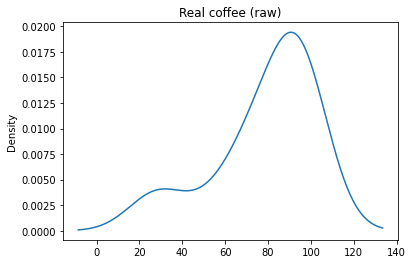

In [9]:
food_df['Real coffee'].plot(kind='density', title='Real coffee (raw)')

For larger datasets this would be more useful as we cannot see our whole dataset, it is clear we have to do something about this, now imagine we can not use regular normalization techniques.
The rank method now comes in handy!

In [10]:
food_df['rank_coffee'] = food_df['Real coffee'].rank()
food_df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread,bin_coffee,bin_qual_coffee,rank_coffee
0,Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26,medium,medium,9.0
1,Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18,medium,high,7.0
2,France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3,medium,medium,8.0
3,Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15,high,low,12.5
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5,medium,medium,11.0
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24,high,medium,14.5
6,England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28,low,low,1.0
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9,low,medium,5.0
8,Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11,low,low,3.0
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,15,79,70,46,61,64,82,48,61,48.0,30,low,low,6.0


At the end of our data a new column was appended, containing the ranking of each country with the lowest being 1 and the highest equal to the amount of countries.
When we visualise this distribution we get a uniform distribution, not normal but still better than before!

<AxesSubplot:title={'center':'Real coffee (ranked)'}, ylabel='Density'>

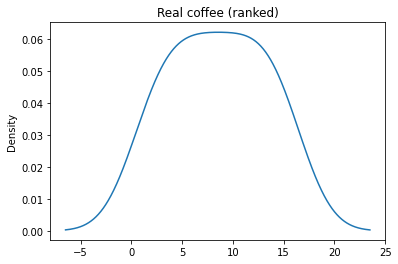

In [11]:
food_df['rank_coffee'].plot(kind='density', title='Real coffee (ranked)')